# How to read and write LCC grids

In [1]:
import nes
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Open dataset

In [3]:
# Original path: /esarchive/exp/snes/a5g1/ip/daily_max/sconco3/sconco3_2022111500.nc
# LCC grid with a coverage over the Iberian Peninsula (4x4km)
path = '/gpfs/projects/bsc32/models/NES_tutorial_data/sconco3_2022111500.nc'

In [4]:
nessy = nes.open_netcdf(path=path, info=True)
nessy

### Read projection

In [5]:
nessy.projection

<Other Coordinate Operation Transformer: lcc>
Description: PROJ-based coordinate operation
Area of Use:
- undefined

In [6]:
nessy.projection_data

{'grid_mapping_name': 'lambert_conformal_conic',
 'standard_parallel': ['43.', '37.'],
 'longitude_of_central_meridian': '-3',
 'latitude_of_projection_origin': '40'}

### Read coordinates

In [7]:
nessy.time

[datetime.datetime(2022, 11, 15, 0, 0), datetime.datetime(2022, 11, 16, 0, 0)]

In [8]:
nessy.lev

{'data': masked_array(data=[0.0],
              mask=[False],
        fill_value=1e+20),
 'dimensions': ('lev',),
 'dtype': dtype('float64'),
 'units': '',
 'positive': 'up'}

In [9]:
nessy.x

{'data': masked_array(data=[-805847.9351268563, -801847.9562619408,
                    -797848.3611696204, -793846.4007854501,
                    -789847.5662888039, -785846.1216190343,
                    -781847.9213501981, -777847.2671101695,
                    -773846.9061521429, -769846.9939697192,
                    -765847.293846135, -761847.9221745483,
                    -757846.163542297, -753847.520017235,
                    -749846.5221757599, -745848.5223450061,
                    -741847.9747165944, -737847.8206283764,
                    -733848.1692062399, -729848.6450912824,
                    -725846.4925581985, -721847.7771631065,
                    -717846.4291098033, -713848.1838551593,
                    -709847.5939102641, -705847.0556986978,
                    -701847.0712934667, -697847.2093511112,
                    -693847.7887569346, -689848.7003865613,
                    -685846.9696608387, -681848.4360065433,
                    -677847.4649052

In [10]:
nessy.y

{'data': masked_array(data=[-795136.6163909845, -791136.4105906406,
                    -787136.9539867737, -783136.5450725392,
                    -779137.4565107584, -775138.1139809864,
                    -771137.9642321683, -767137.282082241,
                    -763137.7656362726, -759136.8645145134,
                    -755137.9757963164, -751137.8485523623,
                    -747137.8831077267, -743137.5261019932,
                    -739137.3282694833, -735138.0100352713,
                    -731136.4493096318, -727136.4660400747,
                    -723136.9335004007, -719136.7043634929,
                    -715136.7747824015, -711138.1405258001,
                    -707137.2565818417, -703136.2438002618,
                    -699138.0710121434, -695136.3720930553,
                    -691135.8131661582, -687136.9650320549,
                    -683136.5603003743, -679137.0150369076,
                    -675136.4830530117, -671136.51150421,
                    -667137.1190239

Variables are built with `x`, `y`, `lev` and `time`as main dimensions, but the coordinates `lat` and `lon` remain accessible

In [11]:
nessy.lat

{'data': masked_array(
   data=[[32.51078414916992, 32.51420211791992, 32.517601013183594, ...,
          32.540653228759766, 32.537384033203125, 32.53408432006836],
         [32.54635238647461, 32.549766540527344, 32.55315399169922, ...,
          32.57624816894531, 32.57295608520508, 32.56965637207031],
         [32.58191680908203, 32.585330963134766, 32.5887451171875, ...,
          32.61181640625, 32.6085319519043, 32.60523223876953],
         ...,
         [46.589630126953125, 46.59383010864258, 46.5980110168457, ...,
          46.62640380859375, 46.62236404418945, 46.61830520629883],
         [46.62516784667969, 46.62936782836914, 46.633548736572266, ...,
          46.661956787109375, 46.65791702270508, 46.65385818481445],
         [46.66069793701172, 46.66490173339844, 46.66908264160156, ...,
          46.69750213623047, 46.693458557128906, 46.689395904541016]],
   mask=[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
  

In [12]:
nessy.lon

{'data': masked_array(
   data=[[-11.548828125, -11.50665283203125, -11.4644775390625, ...,
          5.172332763671875, 5.21453857421875, 5.2567138671875],
         [-11.552886962890625, -11.51068115234375, -11.468475341796875,
          ..., 5.17620849609375, 5.21844482421875, 5.260650634765625],
         [-11.55694580078125, -11.514739990234375, -11.472503662109375,
          ..., 5.180084228515625, 5.22235107421875, 5.26458740234375],
         ...,
         [-13.514434814453125, -13.462738037109375, -13.4110107421875,
          ..., 7.052734375, 7.1044921875, 7.15625],
         [-13.52056884765625, -13.468841552734375, -13.417083740234375,
          ..., 7.05859375, 7.11041259765625, 7.162200927734375],
         [-13.5267333984375, -13.474945068359375, -13.42315673828125, ...,
          7.064483642578125, 7.116302490234375, 7.168121337890625]],
   mask=[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False,

### Read variables

In [13]:
nessy.load()

Rank 000: Loading sconco3 var (1/1)
Rank 000: Loaded sconco3 var ((2, 1, 397, 397))


In [14]:
nessy.variables['sconco3']

{'data': array([[[[0.0415576 , 0.04147514, 0.04152902, ..., 0.03796541,
           0.03792827, 0.0379032 ],
          [0.04146153, 0.04136137, 0.0412977 , ..., 0.0382663 ,
           0.03824312, 0.03822216],
          [0.04059546, 0.04081807, 0.04091855, ..., 0.03847397,
           0.03840729, 0.0383645 ],
          ...,
          [0.04466213, 0.04466087, 0.04464992, ..., 0.03963904,
           0.04006213, 0.04025601],
          [0.04465724, 0.04464634, 0.04463853, ..., 0.0397002 ,
           0.0398435 , 0.0401062 ],
          [0.04465516, 0.04465496, 0.04463719, ..., 0.03971382,
           0.03972259, 0.03986653]]],
 
 
        [[[0.04273837, 0.04270947, 0.04267247, ..., 0.04349075,
           0.04333649, 0.04320888],
          [0.04272898, 0.04268417, 0.04263616, ..., 0.04356325,
           0.04341621, 0.04326808],
          [0.04264436, 0.04263159, 0.04260145, ..., 0.04372539,
           0.04355535, 0.04337517],
          ...,
          [0.04538379, 0.04540338, 0.0454199 , ..., 0.04

## 2. Plot

In [15]:
nessy.create_spatial_bounds()
lon_bnds, lat_bnds = nessy.get_spatial_bounds_mesh_format()

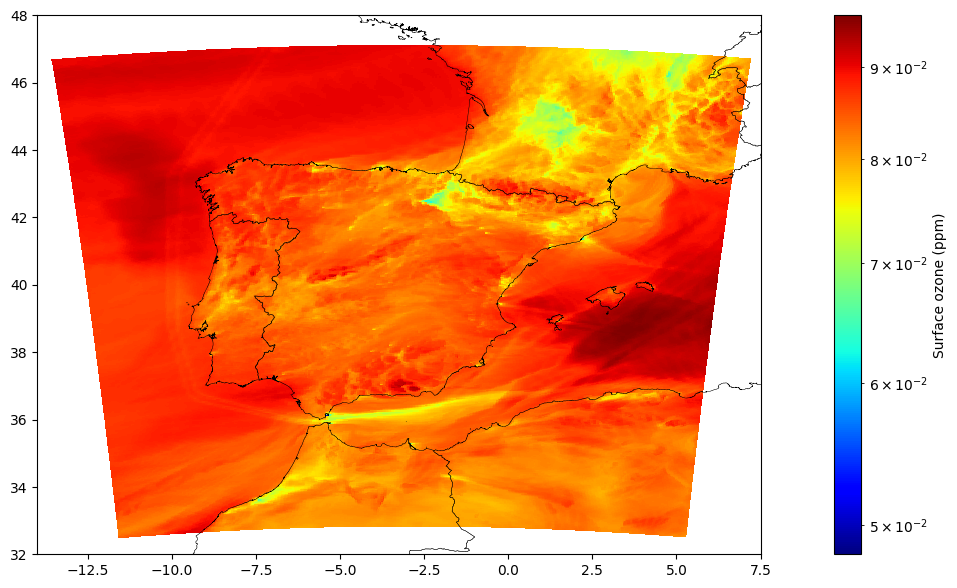

In [16]:
fig, ax = plt.subplots(1, figsize=(19, 7))
ax.set_xlim([-14, 7.5])
ax.set_ylim([32, 48])
plt.pcolormesh(lon_bnds, lat_bnds, nessy.variables['sconco3']['data'].sum(axis=(0, 1)), cmap='jet', 
               norm=matplotlib.colors.LogNorm())
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
plt.colorbar(ax=ax, label='Surface ozone (ppm)')
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [17]:
nessy.to_netcdf('lcc_grid.nc', info=True)

Rank 000: Creating lcc_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done
Rank 000: Writing sconco3 var (1/1)
Rank 000: Var sconco3 created (1/1)
Rank 000: Filling sconco3
Rank 000: Var sconco3 data (1/1)
Rank 000: Var sconco3 completed (1/1)


### Write shapefile

In [18]:
nessy.to_shapefile('lcc_grid_shp')

/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3805: UserWarning: No vertical level has been specified. The first one will be selected.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3816: UserWarning: No time has been specified. The first one will be selected.
  warn(msg)
